**Data Overview & Preprocessing**
**Dataset:** Ford Stock Price Data

**Sources:** Investing.com & Microsoft Excel

**Date Range:** January 2, 2020 – January 2, 2025

**Features Used:**

*   Price: Closing stock price
*   Open, High, Low: Daily price fluctuations
*   Vol.: Trading volume (converted from K/M to numerical values)
*   Change %: Percentage change in price (converted to float)

**Data Preprocessing Steps:**

*   Converted 'Date' to datetime format
*   Cleaned 'Vol.' and 'Change %' columns
*   Ensured no missing values
*   Created lag features for forecasting

# Data Acquisition & Preprocessing

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
#Create Dataframes (invest_df = investing.com, hist_df = Data collected using =STOCKHISTORY function in Microsoft Excel)
invest_df = pd.read_csv("Investing.csv")
hist_df = pd.read_csv("Stockhistory.csv")

In [3]:
invest_df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2020,8.84,8.72,8.84,8.62,"43,432,239",1.26%
1,1/3/2020,8.64,8.73,8.79,8.58,"45,059,915",-2.26%
2,1/6/2020,8.59,8.54,8.60,8.50,"43,380,677",-0.58%
3,1/7/2020,8.68,8.63,8.68,8.56,"45,334,552",1.05%
4,1/8/2020,8.68,8.66,8.73,8.60,"46,003,049",0.00%
...,...,...,...,...,...,...,...
1255,12/27/2024,10.03,10.02,10.20,9.98,"52,899,918",-0.40%
1256,12/30/2024,9.88,9.95,9.98,9.82,"47,116,735",-1.50%
1257,12/31/2024,9.90,9.91,10.01,9.84,"54,104,154",0.20%
1258,1/2/2025,9.65,9.91,9.95,9.64,"67,156,220",-2.53%


In [4]:
hist_df

,Date,Close,Open,High,Low,Volume
0,1/2/2020,$9.42,$9.29,$9.42,$9.19,"43,432,239"
1,1/3/2020,$9.21,$9.31,$9.37,$9.15,"45,059,915"
2,1/6/2020,$9.16,$9.10,$9.17,$9.06,"43,380,677"
3,1/7/2020,$9.25,$9.20,$9.25,$9.12,"45,334,552"
4,1/8/2020,$9.25,$9.23,$9.30,$9.17,"46,003,049"
...,...,...,...,...,...,...
1255,12/27/2024,$10.03,$10.03,$10.20,$9.98,"52,899,918"
1256,12/30/2024,$9.88,$9.95,$9.98,$9.82,"47,116,735"
1257,12/31/2024,$9.90,$9.91,$10.01,$9.84,"54,104,154"
1258,1/2/2025,$9.65,$9.91,$9.96,$9.64,"67,156,220"


In [5]:
#Identify data types for invest_df
invest_df.dtypes 

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [6]:
# Change 'Vol.' and 'Change %' columns from object to float types

# Remove % and , from columns for conversion
invest_df['Change %'] = invest_df['Change %'].str.replace('%', '')
invest_df['Vol.'] = invest_df['Vol.'].str.replace(',', '')

#Convert from object to float type
invest_df['Change %'] = invest_df['Change %'].astype(float)
invest_df['Vol.'] = invest_df['Vol.'].astype(float)

invest_df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [7]:
#Identify data types for hist_df
hist_df.dtypes

Date      object
Close     object
Open      object
High      object
Low       object
Volume    object
dtype: object

In [8]:
# Change 'Close', 'Open', 'High', 'Low', and 'Volume' columns from object to float types

# Remove $ and , from columns for conversion
hist_df['Close'] = hist_df['Close'].str.replace('$', '', regex=True)
hist_df['Open'] = hist_df['Open'].str.replace('$', '', regex=True)
hist_df['High'] = hist_df['High'].str.replace('$', '', regex=True)
hist_df['Low'] = hist_df['Low'].str.replace('$', '', regex=True)
hist_df['Volume'] = hist_df['Volume'].str.replace(',', '')

#Convert from object to float type
hist_df['Close'] =  hist_df['Close'].astype(float)
hist_df['Open'] = hist_df['Open'].astype(float)
hist_df['High'] = hist_df['High'].astype(float)
hist_df['Low'] = hist_df['Low'].astype(float)
hist_df['Volume'] = hist_df['Volume'].astype(float)

hist_df.dtypes

Date       object
Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
dtype: object

In [9]:
#Identify is there are any missing values in invest_df
invest_empty = invest_df.isnull()
print(invest_empty.sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [10]:
#Identify is there are any missing values in hist_df
hist_empty = hist_df.isnull()
print(hist_empty.sum())

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64


In [11]:
# Convert 'Date' column from object to datetime type
hist_df['Date'] = pd.to_datetime(hist_df['Date'])
hist_df

,Date,Close,Open,High,Low,Volume
0,2020-01-02,9.42,9.29,9.42,9.19,43432239.0
1,2020-01-03,9.21,9.31,9.37,9.15,45059915.0
2,2020-01-06,9.16,9.10,9.17,9.06,43380677.0
3,2020-01-07,9.25,9.20,9.25,9.12,45334552.0
4,2020-01-08,9.25,9.23,9.30,9.17,46003049.0
...,...,...,...,...,...,...
1255,2024-12-27,10.03,10.03,10.20,9.98,52899918.0
1256,2024-12-30,9.88,9.95,9.98,9.82,47116735.0
1257,2024-12-31,9.90,9.91,10.01,9.84,54104154.0
1258,2025-01-02,9.65,9.91,9.96,9.64,67156220.0


# Exploratory Data Analysis

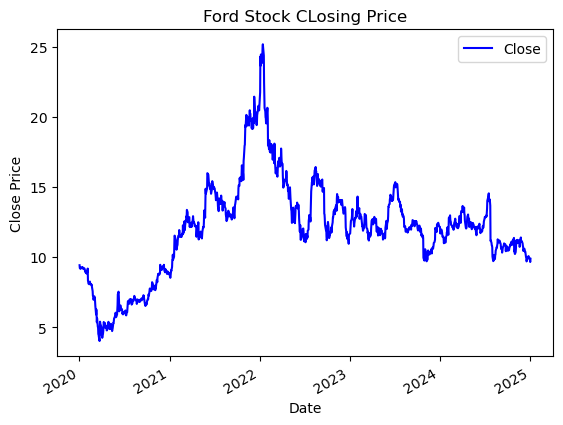

In [12]:
#Create a line graph to show closing stock price over time
hist_df.plot(x='Date', y='Close', kind='line', 
        title='Ford Stock CLosing Price', 
        xlabel='Date', 
        ylabel='Close Price',
        color='blue')
plt.grid(False)
plt.show()

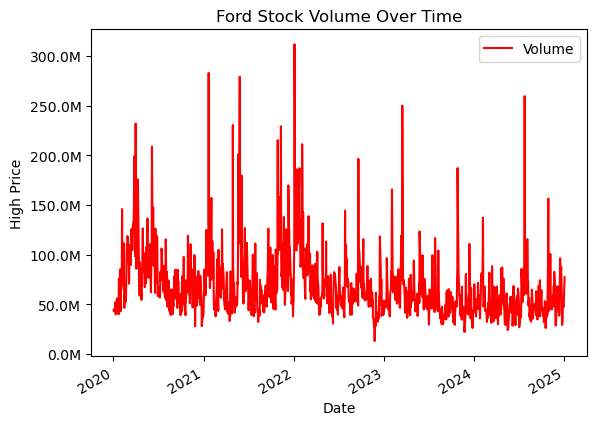

In [39]:
#Create a line graph to show stock volume over time
import matplotlib.ticker as mticker
hist_df.plot(x='Date', y='Volume', kind='line', 
        title='Ford Stock Volume Over Time', 
        xlabel='Date', 
        ylabel='High Price',
        color='red')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
plt.grid(False)
plt.show()

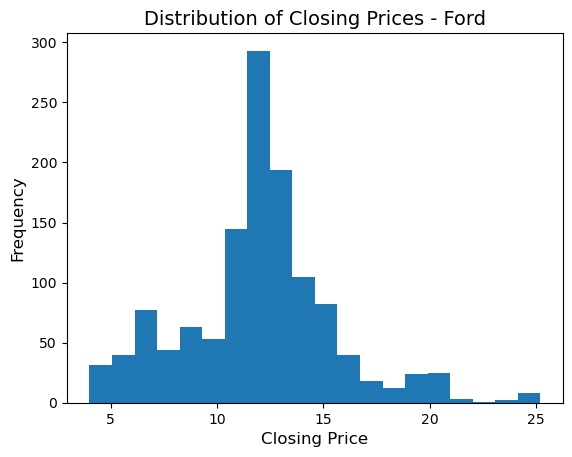

In [14]:
#Create a histogram to show frequency of closing prices over time
ax = hist_df['Close'].hist(bins=20)
ax.set_title("Distribution of Closing Prices - Ford", fontsize=14)
ax.set_xlabel("Closing Price", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.grid(False)

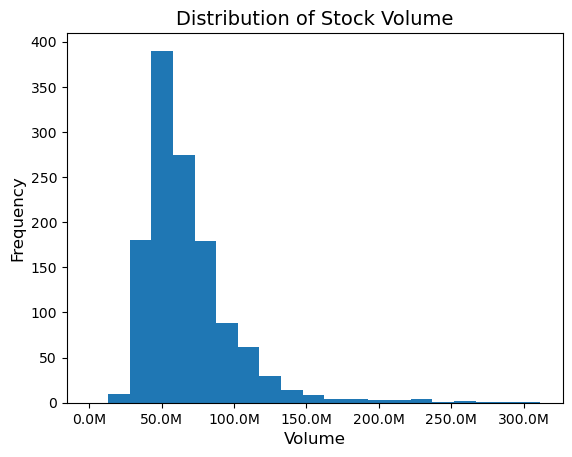

In [15]:
#Create a histogram to show frequency of stock volumes over time
ax = hist_df['Volume'].hist(bins=20)
ax = hist_df['Close'].hist(bins=20)
ax.set_title("Distribution of Stock Volume", fontsize=14)
ax.set_xlabel("Volume", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.grid(False)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

In [16]:
#Create a copy of hist_df for data analysis
month_df = hist_df.copy()

In [17]:
#Find the average closing stock price per month
month_df.set_index('Date', inplace=True)
month_df = month_df['Close'].resample('M').mean()
print(month_df.head())

Date
2020-01-31    9.130476
2020-02-29    7.973684
2020-03-31    5.522273
2020-04-30    4.921905
2020-05-31    5.257500
Freq: M, Name: Close, dtype: float64


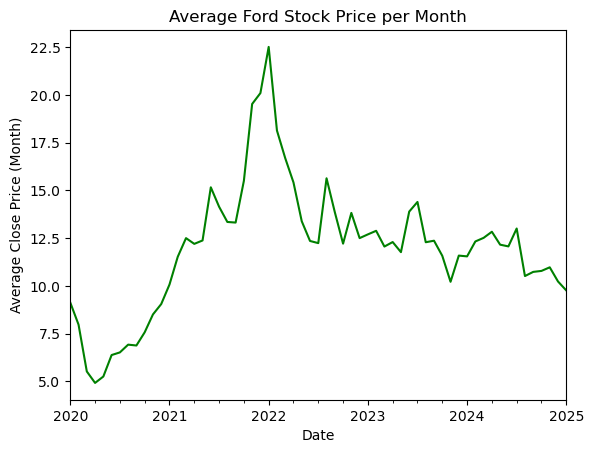

In [18]:
#Create a line graph to show average closing stock price per month over time
month_df.plot(kind='line', 
        title='Average Ford Stock Price per Month', 
        xlabel='Date', 
        ylabel='Average Close Price (Month)',
        color='green')
plt.grid(False)
plt.show()

In [19]:
# Add Month and Year columns to dataframe

#Reset Index
month_df = month_df.reset_index()

#Extract Year from Date column
month_df['Year'] = month_df['Date'].dt.year
#Extract Month from Date column
month_df['Month'] = month_df['Date'].dt.strftime('%B')

In [20]:
month_df

,Date,Close,Year,Month
0,2020-01-31,9.130476,2020,January
1,2020-02-29,7.973684,2020,February
2,2020-03-31,5.522273,2020,March
3,2020-04-30,4.921905,2020,April
4,2020-05-31,5.257500,2020,May
...,...,...,...,...
56,2024-09-30,10.736000,2024,September
57,2024-10-31,10.787391,2024,October
58,2024-11-30,10.975500,2024,November
59,2024-12-31,10.233810,2024,December


In [21]:
#Create a dataframe for the year 2020
df_2020 = month_df[month_df['Year'] == 2020]

#Create a dataframe for the year 2021
df_2021 = month_df[month_df['Year'] == 2021]

#Create a dataframe for the year 2022
df_2022 = month_df[month_df['Year'] == 2022]

#Create a dataframe for the year 2023
df_2023 = month_df[month_df['Year'] == 2023]

#Create a dataframe for the year 2024
df_2024 = month_df[month_df['Year'] == 2024]

#Display 2020 dataframe for reference
df_2020

,Date,Close,Year,Month
0,2020-01-31,9.130476,2020,January
1,2020-02-29,7.973684,2020,February
2,2020-03-31,5.522273,2020,March
3,2020-04-30,4.921905,2020,April
4,2020-05-31,5.257500,2020,May
5,2020-06-30,6.381364,2020,June
6,2020-07-31,6.520000,2020,July
7,2020-08-31,6.926190,2020,August
8,2020-09-30,6.881429,2020,September
9,2020-10-31,7.572273,2020,October


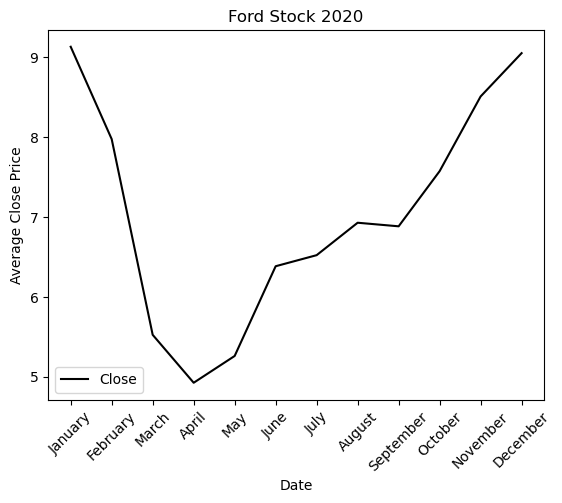

In [22]:
#Create a line graph to show the average closing price per month for the year 2020
plt2020 = df_2020.plot(x='Month', y='Close', kind='line', 
        title='Ford Stock 2020', 
        xlabel='Date', 
        ylabel='Average Close Price',
        color='black')
plt.grid(False)
plt2020.set_xticks(range(len(df_2020))) 
plt2020.set_xticklabels(df_2020['Month'], rotation=45)
plt.show()

In [23]:
#Display 2021 dataframe for reference
df_2021

,Date,Close,Year,Month
12,2021-01-31,10.072632,2021,January
13,2021-02-28,11.526316,2021,February
14,2021-03-31,12.503913,2021,March
15,2021-04-30,12.203333,2021,April
16,2021-05-31,12.381000,2021,May
17,2021-06-30,15.165000,2021,June
18,2021-07-31,14.149524,2021,July
19,2021-08-31,13.350455,2021,August
20,2021-09-30,13.318571,2021,September
21,2021-10-31,15.502857,2021,October


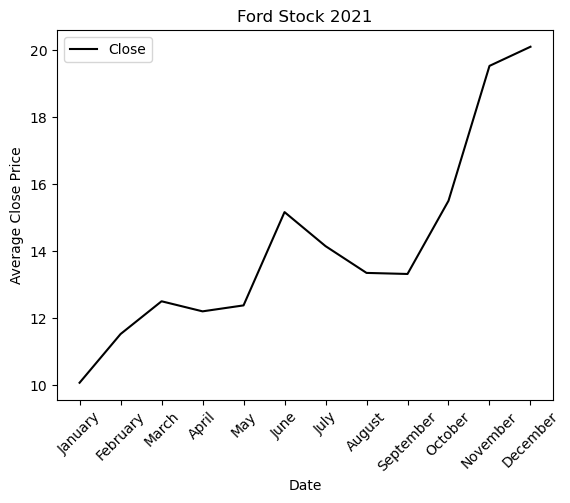

In [24]:
#Create a line graph to show the average closing price per month for the year 2021
plt2021 = df_2021.plot(x='Month', y='Close', kind='line', 
        title='Ford Stock 2021', 
        xlabel='Date', 
        ylabel='Average Close Price',
        color='black')
plt.grid(False)
plt2021.set_xticks(range(len(df_2021))) 
plt2021.set_xticklabels(df_2021['Month'], rotation=45)
plt.show()

In [25]:
#Display 2022 dataframe for reference
df_2022

,Date,Close,Year,Month
24,2022-01-31,22.516000,2022,January
25,2022-02-28,18.138947,2022,February
26,2022-03-31,16.693913,2022,March
27,2022-04-30,15.419500,2022,April
28,2022-05-31,13.387619,2022,May
29,2022-06-30,12.355714,2022,June
30,2022-07-31,12.242000,2022,July
31,2022-08-31,15.637826,2022,August
32,2022-09-30,13.864286,2022,September
33,2022-10-31,12.214762,2022,October


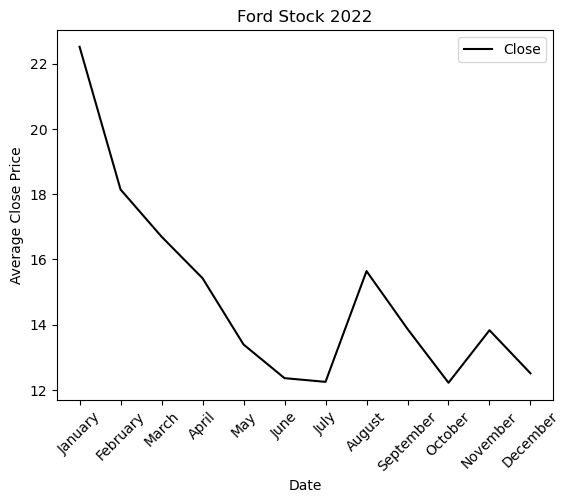

In [26]:
#Create a line graph to show the average closing price per month for the year 2022
plt2022 = df_2022.plot(x='Month', y='Close', kind='line', 
        title='Ford Stock 2022', 
        xlabel='Date', 
        ylabel='Average Close Price',
        color='black')
plt.grid(False)
plt2022.set_xticks(range(len(df_2022))) 
plt2022.set_xticklabels(df_2022['Month'], rotation=45)
plt.show()

In [27]:
#Display 2023 dataframe for reference
df_2023

,Date,Close,Year,Month
36,2023-01-31,12.700000,2023,January
37,2023-02-28,12.886842,2023,February
38,2023-03-31,12.063043,2023,March
39,2023-04-30,12.298421,2023,April
40,2023-05-31,11.770000,2023,May
41,2023-06-30,13.892857,2023,June
42,2023-07-31,14.398500,2023,July
43,2023-08-31,12.289130,2023,August
44,2023-09-30,12.368500,2023,September
45,2023-10-31,11.578636,2023,October


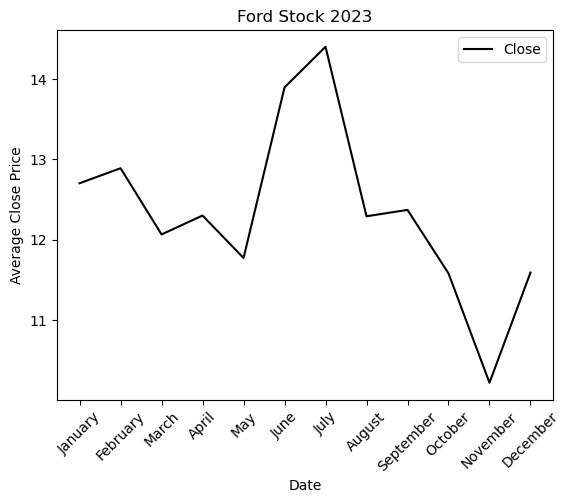

In [28]:
#Create a line graph to show the average closing price per month for the year 2023
plt2023 = df_2023.plot(x='Month', y='Close', kind='line', 
        title='Ford Stock 2023', 
        xlabel='Date', 
        ylabel='Average Close Price',
        color='black')
plt.grid(False)
plt2023.set_xticks(range(len(df_2023))) 
plt2023.set_xticklabels(df_2023['Month'], rotation=45)
plt.show()

In [29]:
#Display 2024 dataframe for reference
df_2024

,Date,Close,Year,Month
48,2024-01-31,11.548095,2024,January
49,2024-02-29,12.329500,2024,February
50,2024-03-31,12.518000,2024,March
51,2024-04-30,12.837727,2024,April
52,2024-05-31,12.160909,2024,May
53,2024-06-30,12.070526,2024,June
54,2024-07-31,13.007273,2024,July
55,2024-08-31,10.517727,2024,August
56,2024-09-30,10.736000,2024,September
57,2024-10-31,10.787391,2024,October


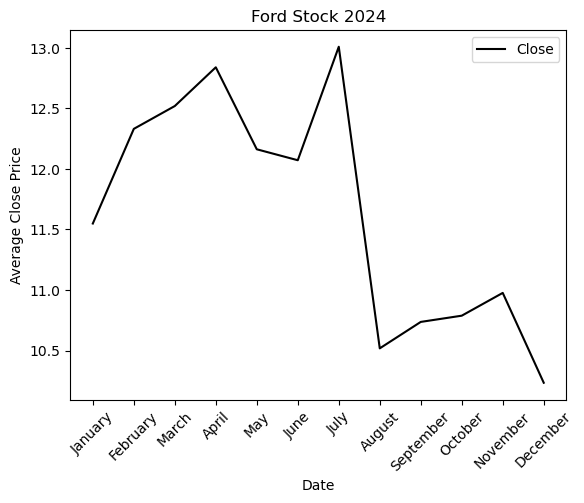

In [30]:
#Create a line graph to show the average closing price per month for the year 2024

plt2024 = df_2024.plot(x='Month', y='Close', kind='line', 
        title='Ford Stock 2024', 
        xlabel='Date', 
        ylabel='Average Close Price',
        color='black')
plt.grid(False)
plt2024.set_xticks(range(len(df_2024))) 
plt2024.set_xticklabels(df_2024['Month'], rotation=45)
plt.show()

In [31]:
# Create a copy of the hist_df to use for a correlation matrix
corr_df = hist_df.copy()

#Create the 'Percent Change' column
corr_df['Percent Change'] = corr_df['Close'].pct_change() * 100

#Fill in any blank vlaues with 0 (represent no change)
corr_df['Percent Change'].fillna(0, inplace=True)

#Get the Year value from date
corr_df['Year'] = hist_df['Date'].dt.year

#Get the Month value from date
corr_df['Month'] = hist_df['Date'].dt.strftime('%B')

#Get the Day value from date
corr_df['Day'] = hist_df['Date'].dt.strftime('%d')

#Get the Day of the week name from date
corr_df['Day of the Week'] = hist_df['Date'].dt.day_name()

In [32]:
# Change 'Day' column from object to int64 data type
corr_df['Day'] = corr_df['Day'].astype('int64')

#Change 'Month' values from names to numbers (1-12)
corr_df['Month'] = pd.to_datetime(corr_df['Month'], format='%B').dt.month

#Assign each day of the week a number (0-6)
days_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

#Change values in 'Day of the week column from names to numbers
corr_df['Day of the Week'] = corr_df['Day of the Week'].map(days_mapping)

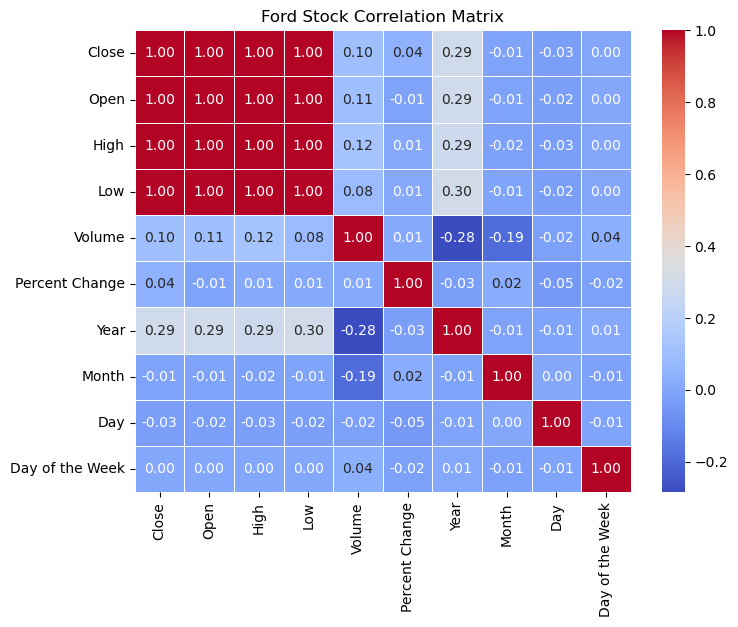

In [33]:
# Create a correlation Matrx to show relationhsips between features
corr_matrix = corr_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ford Stock Correlation Matrix")
plt.show()

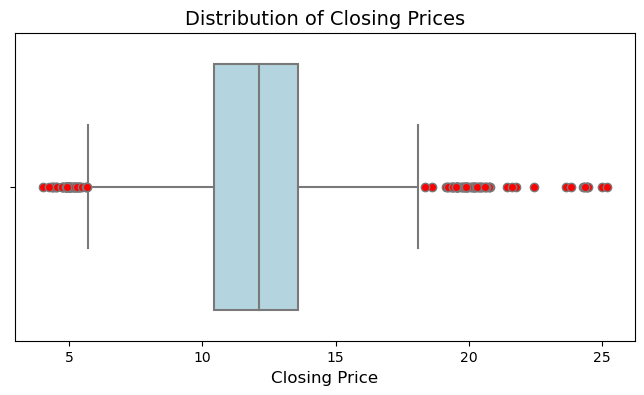

In [34]:
#Create a box plot to show outliers of Close stock prices
plt.figure(figsize=(8,4))
sns.boxplot(x=corr_df['Close'], color="lightblue", flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})

plt.title("Distribution of Closing Prices", fontsize=14)
plt.xlabel("Closing Price", fontsize=12)

plt.show()

# Additional Analysis

In [35]:
#Get statistics (count, mean, median, mode, percentiles) for each feature
stat_df = corr_df[['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Percent Change']]
stat_df.describe()

,Close,Open,High,Low,Volume,Percent Change
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,12.009960,12.013500,12.200357,11.820254,6.814601e+07,0.043166
std,3.486055,3.480076,3.549997,3.412630,3.249382e+07,2.807285
min,4.010000,4.270000,4.420000,3.960000,1.298086e+07,-18.361375
25%,10.417500,10.400000,10.565000,10.280000,4.817676e+07,-1.428402
50%,12.110000,12.100000,12.250000,11.955000,5.964017e+07,0.000000
75%,13.582500,13.630000,13.820000,13.370000,7.883739e+07,1.459684
max,25.190000,24.870000,25.870000,24.370000,3.116452e+08,23.441397


In [36]:
#Identify missing values in dataset
print("Missing Values in Dataset:\n")
print(stat_df.isnull().sum().to_string())

Missing Values in Dataset:

Date              0
Close             0
Open              0
High              0
Low               0
Volume            0
Percent Change    0
